# PCA + Regressions on SPI and Average Maximum Temperature Features (April to October)

## 1. Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np

import glob

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sktime.utils.plotting import plot_series

import seaborn as sns

In [2]:
# DATA PREPARATION
feature_df = pd.read_csv('../data/feature_df.csv', header=0)
feature_df.index = range(1971, 2023)
feature_df.head(10)

,Canola_detrend,precipitation_in_4_calculated_index,precipitation_in_5_calculated_index,precipitation_in_6_calculated_index,precipitation_in_7_calculated_index,precipitation_in_8_calculated_index,precipitation_in_9_calculated_index,precipitation_in_10_calculated_index,avg_max_temp_in_4,avg_max_temp_in_5,avg_max_temp_in_6,avg_max_temp_in_7,avg_max_temp_in_8,avg_max_temp_in_9,avg_max_temp_in_10
1971,0.835685,1.552420,0.398286,1.608689,-1.138548,-0.619148,0.699883,1.150625,284.674011,291.586487,295.451691,297.247833,301.780426,292.659363,285.051239
1972,1.019651,0.310719,0.272510,-0.248256,-0.270669,-0.278103,-0.179716,-0.901951,282.146759,292.675629,296.554260,296.034912,299.861603,291.575226,282.966553
1973,3.180447,0.277076,-0.334090,0.603571,0.403538,0.782308,2.709394,0.711722,283.948242,291.120361,296.939117,298.817383,301.038696,291.306488,287.401154
1974,-0.681926,0.740812,1.373921,-1.551774,-0.435588,0.232750,-1.372053,-1.695853,281.231293,287.215179,296.320404,301.303864,296.313019,291.511688,288.256470
1975,-1.567468,2.002202,-0.518458,1.556986,0.509661,1.773032,0.895744,1.033422,275.753235,289.641205,294.908081,300.886871,296.023590,291.019562,285.494232
1976,0.523820,0.532937,-1.697363,0.961862,-1.446509,0.499695,-1.474134,-2.029217,283.979858,292.507629,296.083862,299.666107,300.495178,297.305878,283.504913
1977,0.591938,-1.059830,0.273647,-0.688714,-0.430323,-0.897585,1.339607,-1.142240,290.806793,297.221161,296.493164,300.909698,296.245300,290.973480,287.136871
1978,0.636888,-0.105057,0.681106,-1.141082,-0.218658,-0.842599,1.921957,-0.756340,283.612152,293.872833,297.419464,299.356598,300.507751,295.736267,287.023193
1979,-2.341333,0.840549,0.646930,-0.982525,0.189466,-1.968555,0.959279,-0.739282,276.046600,286.521606,296.374207,300.664185,297.919647,294.441315,284.963867
1980,-10.342722,-1.357788,-2.438554,-0.763792,-0.754718,2.122007,0.205853,0.806743,289.224030,296.703491,297.945221,301.438324,295.128296,292.048950,283.809509


                                      Canola_detrend  \
Canola_detrend                              1.000000   
precipitation_in_4_calculated_index        -0.132658   
precipitation_in_5_calculated_index         0.048934   
precipitation_in_6_calculated_index         0.162117   
precipitation_in_7_calculated_index         0.301788   
precipitation_in_8_calculated_index        -0.102243   
precipitation_in_9_calculated_index         0.172889   
precipitation_in_10_calculated_index       -0.024238   
avg_max_temp_in_4                           0.023956   
avg_max_temp_in_5                           0.111822   
avg_max_temp_in_6                          -0.193440   
avg_max_temp_in_7                          -0.424742   
avg_max_temp_in_8                          -0.067184   
avg_max_temp_in_9                          -0.021956   
avg_max_temp_in_10                         -0.161278   

                                      precipitation_in_4_calculated_index  \
Canola_detrend            

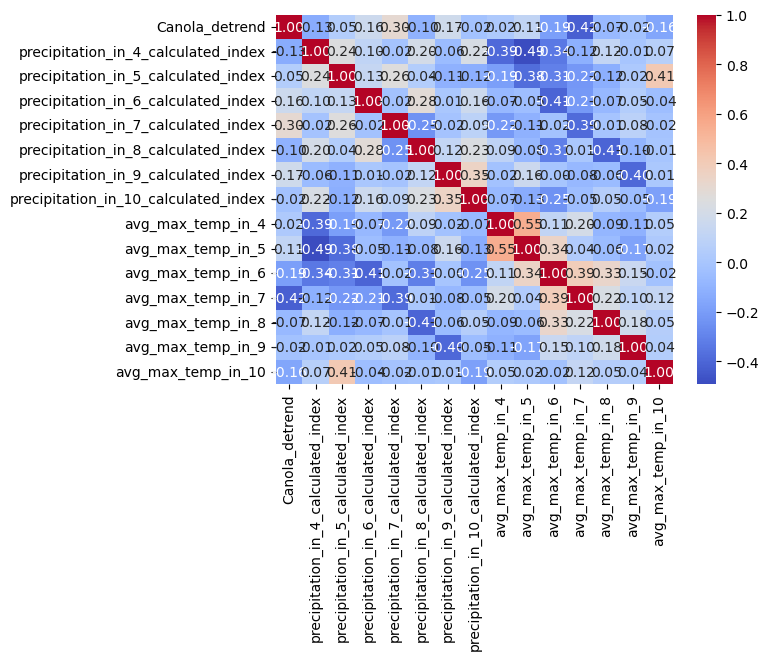

In [3]:
correlation_matrix = feature_df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Notable correlations include:
- avg_max_temp_in_7 on the yield
- SPI in April on avg_max_temp_in_5

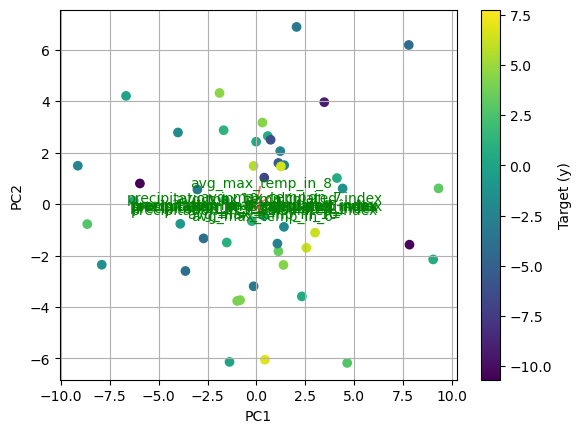

array([0.33614914, 0.16574511, 0.11007598, 0.09520502, 0.08285145,
       0.06958461, 0.0413699 , 0.02437957, 0.01904839, 0.01568353,
       0.01399931, 0.00972674, 0.00864623, 0.00753502])

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

scaler = StandardScaler()
X = feature_df.iloc[:, 1:] 
y = feature_df.iloc[:, 0] 

scaler.fit(X)

pca = PCA()
pca.fit(X, y)
X_pca_new = pca.transform(X)   

def pca_plot(score, coeff, labels=None, cmap='viridis'):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # Scatter plot with colormap
    scatter = plt.scatter(xs, ys, c=y, cmap=cmap)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.colorbar(scatter, label='Target (y)')
    plt.grid()

# Example of providing labels for features
feature_labels = X.columns.tolist()  # Assuming X is a DataFrame
pca_plot(X_pca_new[:, 0:2], pca.components_, labels=feature_labels)
plt.show()

explained_variance=pca.explained_variance_ratio_
explained_variance

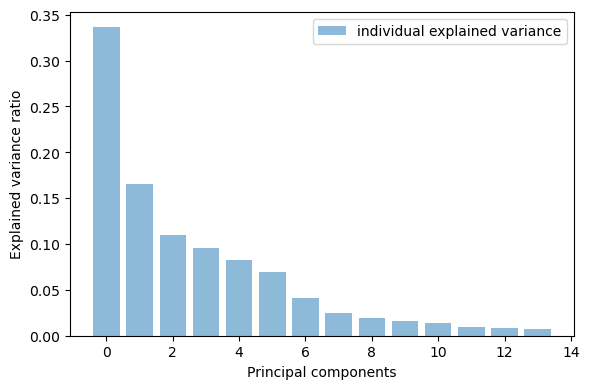

In [5]:
plt.figure(figsize=(6, 4))

plt.bar(range(14), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [6]:
model = PCA(n_components=14).fit(X)
X_pc = model.transform(X)

# Number of components
n_pcs = model.components_.shape[0]

# Number of top features to consider for each component
top_features_count = 14

# Get the indices of the top features on EACH component
top_features_indices = [np.abs(model.components_[i]).argsort()[-top_features_count:][::-1] for i in range(n_pcs)]
initial_feature_names = feature_df.columns[1:].tolist()

top_features_names = [[initial_feature_names[idx] for idx in component_indices] for component_indices in top_features_indices]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): top_features_names[i] for i in range(n_pcs)}

# Build the DataFrame
df_pca = pd.DataFrame(dic.items(), columns=['Principal Component', 'Top Features'])

df_pca

,Principal Component,Top Features
0,PC0,"[avg_max_temp_in_4, avg_max_temp_in_5, avg_max..."
1,PC1,"[avg_max_temp_in_6, avg_max_temp_in_8, avg_max..."
2,PC2,"[avg_max_temp_in_10, avg_max_temp_in_9, avg_ma..."
3,PC3,"[avg_max_temp_in_10, avg_max_temp_in_9, avg_ma..."
4,PC4,"[avg_max_temp_in_7, avg_max_temp_in_5, avg_max..."
5,PC5,"[avg_max_temp_in_8, avg_max_temp_in_7, avg_max..."
6,PC6,"[avg_max_temp_in_5, avg_max_temp_in_6, avg_max..."
7,PC7,"[precipitation_in_10_calculated_index, precipi..."
8,PC8,"[precipitation_in_7_calculated_index, precipit..."
9,PC9,"[precipitation_in_6_calculated_index, precipit..."


In [7]:
print(df_pca['Top Features'][0])
print(df_pca['Top Features'][1])
print(df_pca['Top Features'][2])
print(df_pca['Top Features'][3])
print(df_pca['Top Features'][4])

['avg_max_temp_in_4', 'avg_max_temp_in_5', 'avg_max_temp_in_6', 'avg_max_temp_in_7', 'precipitation_in_4_calculated_index', 'avg_max_temp_in_9', 'precipitation_in_5_calculated_index', 'precipitation_in_7_calculated_index', 'avg_max_temp_in_8', 'precipitation_in_6_calculated_index', 'precipitation_in_10_calculated_index', 'avg_max_temp_in_10', 'precipitation_in_9_calculated_index', 'precipitation_in_8_calculated_index']
['avg_max_temp_in_6', 'avg_max_temp_in_8', 'avg_max_temp_in_9', 'avg_max_temp_in_7', 'precipitation_in_8_calculated_index', 'avg_max_temp_in_4', 'precipitation_in_6_calculated_index', 'avg_max_temp_in_10', 'precipitation_in_5_calculated_index', 'precipitation_in_9_calculated_index', 'precipitation_in_10_calculated_index', 'precipitation_in_4_calculated_index', 'precipitation_in_7_calculated_index', 'avg_max_temp_in_5']
['avg_max_temp_in_10', 'avg_max_temp_in_9', 'avg_max_temp_in_5', 'avg_max_temp_in_6', 'avg_max_temp_in_4', 'precipitation_in_5_calculated_index', 'precipi

## Modelling

In [8]:
# DATA PREPARATION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(41, 14)

In [9]:
# RF Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

estimators = np.arange(10, 50, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

[-0.29609095913932104, -0.19520169801232723, -0.052970242623423314, -0.1603723938485826]


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=3)

forest = RandomForestRegressor(n_estimators=200, criterion="squared_error", min_samples_leaf=3, min_samples_split=3, max_depth=10)

forest.fit(x_train, y_train)

# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(x_test, y_test, sample_weight=None))
print(forest.score(x_test, y_test))

Score: -0.13
-0.1339420325050269


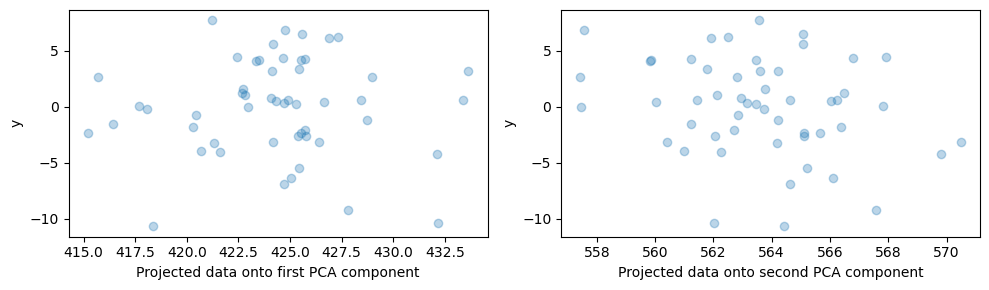

In [11]:
rng = np.random.RandomState(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

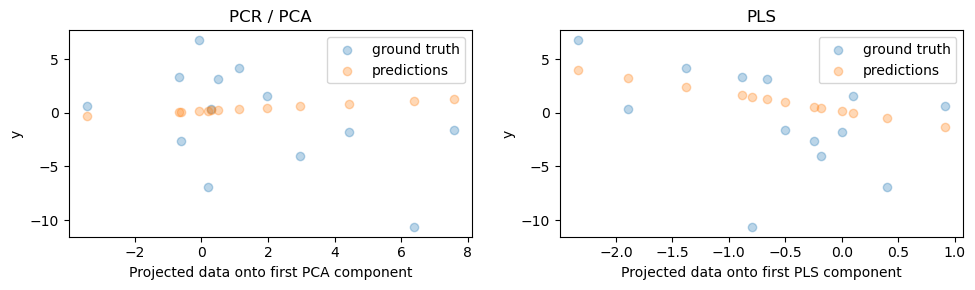

In [12]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [13]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}") # better than PCR but also bad, only narrowly better than mean prediction

PCR r-squared -0.144
PLS r-squared 0.044


In [14]:
r_squared_values = []

for n_components in range(1, 15):
    # Create the PCA pipeline with the specified number of components
    pca_model = make_pipeline(PCA(n_components=n_components), LinearRegression())
    
    # Fit the model on the training data
    pca_model.fit(X_train, y_train)
    
    # Calculate R-squared on the test data and append to the list
    r_squared = pca_model.score(X_test, y_test)
    r_squared_values.append(r_squared)
    
    print(f"PCR r-squared with {n_components} components: {r_squared:.3f}") # optimal PCR with 8 components

PCR r-squared with 1 components: -0.144
PCR r-squared with 2 components: -0.058
PCR r-squared with 3 components: -0.028
PCR r-squared with 4 components: 0.132
PCR r-squared with 5 components: 0.136
PCR r-squared with 6 components: 0.144
PCR r-squared with 7 components: 0.155
PCR r-squared with 8 components: 0.172
PCR r-squared with 9 components: 0.140
PCR r-squared with 10 components: -0.224
PCR r-squared with 11 components: -0.255
PCR r-squared with 12 components: -0.208
PCR r-squared with 13 components: -0.138
PCR r-squared with 14 components: -0.137


In [15]:
pls_r_squared_values = []

for n_components in range(1, 15):
    # Create the PLS model with the specified number of components
    pls_model = PLSRegression(n_components=n_components)

    # Fit the PLS model on the training data
    pls_model.fit(X_train, y_train)

    # Calculate R-squared for PLS on the test data and append to the list
    pls_r_squared = pls_model.score(X_test, y_test)
    pls_r_squared_values.append(pls_r_squared)

    print(f"PLS r-squared with {n_components} components: {pls_r_squared:.3f}")

# Print the R-squared values for PLS
print("PLS R-squared values for different numbers of components:", pls_r_squared_values) # optimal PLS with 2 comps

PLS r-squared with 1 components: 0.044
PLS r-squared with 2 components: 0.165
PLS r-squared with 3 components: -0.096
PLS r-squared with 4 components: -0.150
PLS r-squared with 5 components: -0.132
PLS r-squared with 6 components: -0.151
PLS r-squared with 7 components: -0.135
PLS r-squared with 8 components: -0.138
PLS r-squared with 9 components: -0.137
PLS r-squared with 10 components: -0.137
PLS r-squared with 11 components: -0.137
PLS r-squared with 12 components: -0.137
PLS r-squared with 13 components: -0.137
PLS r-squared with 14 components: -0.137
PLS R-squared values for different numbers of components: [0.044088134178211114, 0.1646444066726901, -0.09613921437883866, -0.14985344565701797, -0.13178524397472935, -0.15062655132181613, -0.1354195736407282, -0.13750670166253287, -0.1371707079394462, -0.13668928183857476, -0.1368988720299502, -0.13693374536307545, -0.13685580296139888, -0.13686222155019157]


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X = feature_df.iloc[:, 1:] 
y = feature_df.iloc[:, 0] 


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.18, 
                                                    random_state=42) # 42 training and 10 test samples

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = feature_df.copy()

print("training", training.shape)


X_train (42, 14)
y_train (42,)
X_test (10, 14)
y_test (10,)
training (52, 15)


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

pca = PCA()

X_reduced_train = pca.fit_transform(scale(X_train))

X_reduced_train[0:1,:]

array([[ 1.60258155, -1.1203414 ,  4.65986214, -0.33714791, -0.08367549,
         1.16734861, -1.6493539 , -1.36271525, -0.53622621,  0.90916581,
         0.66326899,  0.1995962 , -0.17373636, -0.62557603]])

In [18]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([19.39, 35.66, 49.63, 59.25, 67.63])

In [19]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

print(pcr_model.intercept_)
print(pcr_model.coef_)

0.3197950104731335
[-0.34038617  0.24208334 -0.75726021  0.18029592 -1.04655366 -0.71875835
 -1.09283082 -0.6736116   0.91405014  0.39876736 -0.92494563  1.4172578
  1.71873011  1.12091349]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([-3.57552027, -1.76006886, -2.86779038,  1.49192992, -0.68364262])

In [21]:
np.sqrt(mean_squared_error(y_train, y_pred))

3.3807362998955583

In [22]:
r2_score(y_train, y_pred)

0.3787914380847289

In [23]:
from sklearn import model_selection
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
lm = LinearRegression()

RMSE = []

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

Text(0.5, 1.0, 'PCR Model Tuning')

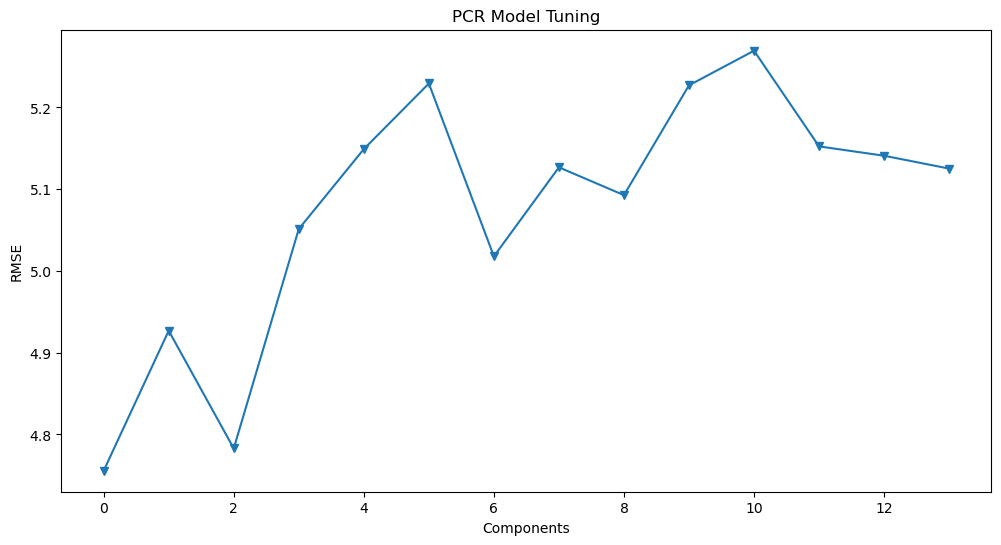

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(RMSE, '-v')
plt.xlabel('Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning') # confirms optimal n_comps = 2

In [25]:
def pcr(X, y, pc):
    '''
        Principal Component Regression in Python
    '''
    # Step 1: PCA on the input data
    # Define the PCA object
    pca = PCA()
    # Preprocessing (1): first derivative
    d1X = savgol_filter(X, 13, polyorder=5, deriv=1)
    
    # Preprocessing (2): standardize features by removing the mean and saling to unit variance
    Xstd = StandardScaler().fit_transform(d1X[:, :])
    
    # Run PCA producing the reduced variable Xreg and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:, :pc]
    
    # Step 2: Regression on selected components
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Fit
    regr.fit(Xreg, y)
    
    # Calibration
    y_c = regr.predict(Xreg)
    
    # Cross-validation
    y_cv = cross_val_predict(regr, Xreg, y, cv=10)
    
    # Calcualte scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    
    return (y_cv, score_c, score_cv, mse_c, mse_cv)

In [37]:
from scipy.signal import savgol_filter
from sklearn import linear_model

r2s_c = []
r2s_cv = []
mses_c = []
mses_cv = []
for pc in range(1, 14):
    y_cv, score_c, score_cv, mse_c, mse_cv = pcr(X, y, pc)
    r2s_c.append(score_c)
    r2s_cv.append(score_cv)
    mses_c.append(mse_c)
    mses_cv.append(mse_cv)

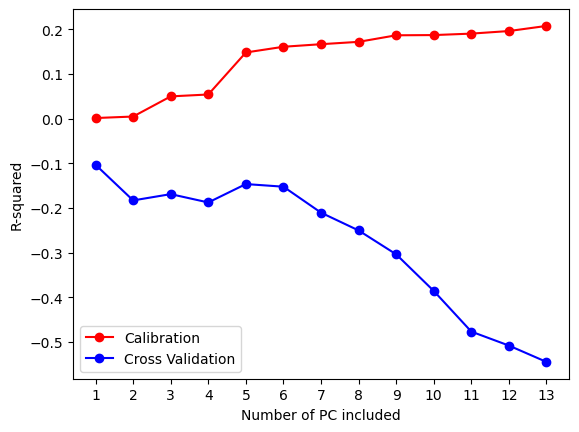

In [38]:
xticks = np.arange(1, 14).astype('uint8')
plt.plot(xticks, r2s_c, '-o', label='Calibration', color='red')
plt.plot(xticks, r2s_cv, '-o', label='Cross Validation', color='blue')
plt.xticks(xticks)
plt.xlabel('Number of PC included')
plt.ylabel('R-squared')
plt.legend() # confirms 5-6 to be best

In [28]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have X_train, X_test, y_train, and y_test defined
# Assuming feature_df, initial_feature_names, and other relevant variables are still available

X = feature_df.iloc[:, 1:] 
y = feature_df.iloc[:, 0]

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA with 8 components
pca_model = PCA(n_components=8)
X_pca = pca_model.fit_transform(X_standardized)

# Create a DataFrame with the PCA components
pca_columns = [f'PC{i+1}' for i in range(8)]
df_pca_components = pd.DataFrame(data=X_pca, columns=pca_columns, index=feature_df.index)

# Concatenate the PCA components DataFrame with the target variable
df_pca_final = pd.concat([y, df_pca_components], axis=1)

# Display the DataFrame with PCA components and target variable
print(df_pca_final.head())

# Split the data into training and testing sets
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(df_pca_final.drop(columns=['Canola_detrend']),
                                                                    df_pca_final['Canola_detrend'],
                                                                    test_size=0.18,
                                                                    random_state=1)

# Continue with your modeling using X_pca_train, X_pca_test, y_pca_train, and y_pca_test
# For example, you can use Linear Regression as follows:

lm_pca = LinearRegression()
lm_pca.fit(X_pca_train, y_pca_train)

# Predictions
y_pca_pred_train = lm_pca.predict(X_pca_train)
y_pca_pred_test = lm_pca.predict(X_pca_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_pca_train, y_pca_pred_train)
mse_test = mean_squared_error(y_pca_test, y_pca_pred_test)
r2_train = r2_score(y_pca_train, y_pca_pred_train)
r2_test = r2_score(y_pca_test, y_pca_pred_test)

print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')
print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')


      Canola_detrend       PC1       PC2       PC3       PC4       PC5  \
1971        0.835685 -1.324604  0.496753  1.166336  0.186976 -0.527451   
1972        1.019651 -0.215867 -0.061370 -0.228745 -1.133185  0.202644   
1973        3.180447 -0.480986  1.311644  1.006561 -0.581395 -2.303523   
1974       -0.681926 -0.909252 -1.693239 -1.902624  1.725852 -1.458392   
1975       -1.567468 -3.040428  1.433482  1.378540  0.733918 -0.668176   

           PC6       PC7       PC8  
1971 -1.607104  1.851801  0.385995  
1972  0.999519  1.527827 -0.022167  
1973 -1.282337 -0.038200 -0.932799  
1974  2.642343 -0.315288 -0.005692  
1975  0.561963 -0.365194 -1.607467  
Mean Squared Error (Train): 12.4360
Mean Squared Error (Test): 20.0234
R-squared (Train): 0.3423
R-squared (Test): -0.2307


In [47]:
# LASSO

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit Lasso Regression model
lasso_model = Lasso(alpha=.8)  # You can adjust the value of alpha as needed
lasso_model.fit(X_pca_train, y_pca_train)

# Predictions
y_lasso_pred_train = lasso_model.predict(X_pca_train)
y_lasso_pred_test = lasso_model.predict(X_pca_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_pca_train, y_lasso_pred_train)
mse_test = mean_squared_error(y_pca_test, y_lasso_pred_test)
r2_train = r2_score(y_pca_train, y_lasso_pred_train)
r2_test = r2_score(y_pca_test, y_lasso_pred_test)

print("Lasso Regression Results:")

print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')

print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')

# Print the intercept
print("Intercept:", lasso_model.intercept_)

# Print the number of iterations performed during fitting
print("Number of iterations:", lasso_model.n_iter_)

# Additional information specific to Lasso
print("Alpha (regularization strength):", lasso_model.alpha)
print("Non-zero coefficients:", sum(lasso_model.coef_ != 0))

print(X_pca_train.columns[lasso_model.coef_ != 0])

# Display the Lasso Regression coefficients
lasso_coefficients = pd.Series(lasso_model.coef_, index=X_pca_train.columns)
print("Lasso Regression Coefficients:")
print(lasso_coefficients)

Lasso Regression Results:
Mean Squared Error (Train): 14.8940
Mean Squared Error (Test): 15.4264
R-squared (Train): 0.2123
R-squared (Test): 0.0519
Intercept: 0.030018092395776685
Number of iterations: 4
Alpha (regularization strength): 0.8
Non-zero coefficients: 3
Index(['PC1', 'PC3', 'PC4'], dtype='object')
Lasso Regression Coefficients:
PC1   -0.046502
PC2    0.000000
PC3   -0.172396
PC4   -1.113910
PC5    0.000000
PC6   -0.000000
PC7    0.000000
PC8    0.000000
dtype: float64


In [53]:
# RIDGE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have X_pca_train, X_pca_test, y_pca_train, and y_pca_test defined

# Create and fit Ridge Regression model
ridge_model = Ridge(alpha=3)  # You can adjust the value of alpha as needed
ridge_model.fit(X_pca_train, y_pca_train)

# Predictions
y_ridge_pred_train = ridge_model.predict(X_pca_train)
y_ridge_pred_test = ridge_model.predict(X_pca_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_pca_train, y_ridge_pred_train)
mse_test = mean_squared_error(y_pca_test, y_ridge_pred_test)
r2_train = r2_score(y_pca_train, y_ridge_pred_train)
r2_test = r2_score(y_pca_test, y_ridge_pred_test)

print("Ridge Regression Results:")

print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')

print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')

# Print the intercept
print("Intercept:", ridge_model.intercept_)

# Print the number of iterations performed during fitting
print("Number of iterations:", ridge_model.n_iter_)

# Additional information specific to Lasso
print("Alpha (regularization strength):", ridge_model.alpha)
print("Non-zero coefficients:", sum(ridge_model.coef_ != 0))

print(X_pca_train.columns[ridge_model.coef_ != 0])

# Display the Lasso Regression coefficients
ridge_coefficients = pd.Series(ridge_model.coef_, index=X_pca_train.columns)
print("Ridge Regression Coefficients:")
print(ridge_coefficients)


Ridge Regression Results:
Mean Squared Error (Train): 12.4531
Mean Squared Error (Test): 19.3482
R-squared (Train): 0.3414
R-squared (Test): -0.1892
Intercept: 0.13207287333600873
Number of iterations: None
Alpha (regularization strength): 3
Non-zero coefficients: 8
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')
Ridge Regression Coefficients:
PC1   -0.307775
PC2    0.237329
PC3   -0.655265
PC4   -1.591943
PC5    0.369036
PC6   -0.649494
PC7    0.588603
PC8    0.413449
dtype: float64


In [59]:
# Elastic Net

from sklearn.linear_model import ElasticNet

# Create and fit Elastic Net Regression model
elastic_net_model = ElasticNet(alpha=1, l1_ratio=0.3)  # You can adjust the values of alpha and l1_ratio
elastic_net_model.fit(X_pca_train, y_pca_train)

# Predictions
y_elastic_net_pred_train = elastic_net_model.predict(X_pca_train)
y_elastic_net_pred_test = elastic_net_model.predict(X_pca_test)

# Evaluate the model performance
mse_train = mean_squared_error(y_pca_train, y_elastic_net_pred_train)
mse_test = mean_squared_error(y_pca_test, y_elastic_net_pred_test)
r2_train = r2_score(y_pca_train, y_elastic_net_pred_train)
r2_test = r2_score(y_pca_test, y_elastic_net_pred_test)

print(f'Elastic Net Results:')

print(f'Mean Squared Error (Train): {mse_train:.4f}')
print(f'Mean Squared Error (Test): {mse_test:.4f}')
print(f'R-squared (Train): {r2_train:.4f}')
print(f'R-squared (Test): {r2_test:.4f}')

# Print the intercept
print("Intercept:", elastic_net_model.intercept_)

# Print the number of iterations performed during fitting
print("Number of iterations:", elastic_net_model.n_iter_)

# Additional information specific to Lasso
print("Alpha (regularization strength):", elastic_net_model.alpha)
print("Non-zero coefficients:", sum(elastic_net_model.coef_ != 0))

print(X_pca_train.columns[elastic_net_model.coef_ != 0])

# Display the Elastic Net Regression coefficients
elastic_net_coefficients = pd.Series(elastic_net_model.coef_, index=X_pca_train.columns)
print("Elastic Net Regression Coefficients:")
print(elastic_net_coefficients)

Elastic Net Results:
Mean Squared Error (Train): 14.0304
Mean Squared Error (Test): 15.8318
R-squared (Train): 0.2580
R-squared (Test): 0.0270
Intercept: 0.020468805225910908
Number of iterations: 4
Alpha (regularization strength): 1
Non-zero coefficients: 7
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], dtype='object')
Elastic Net Regression Coefficients:
PC1   -0.163786
PC2    0.145747
PC3   -0.342484
PC4   -0.983585
PC5    0.110977
PC6   -0.206718
PC7    0.204339
PC8    0.000000
dtype: float64


In [32]:
# TODO: format notebook; tune alpha; try out lower no. of PCs